In [34]:
!pip install ipython-sql

   ---------------------------------------- 0.0/44.0 kB ? eta -:--:--
   ---------------------------------------- 44.0/44.0 kB 2.1 MB/s eta 0:00:00


In [35]:
import pandas as pd
import numpy as ny
import sqlite3

In [ ]:
df_HD = pd.read_excel("Cardiac_Outcomes.xlsx", "Hospitalization_Discharge")
df_CC = pd.read_excel("Cardiac_Outcomes.xlsx", "CardiacComplications")
df_Res = pd.read_excel("Cardiac_Outcomes.xlsx", "Responsivenes")
df_PH = pd.read_excel("Cardiac_Outcomes.xlsx", "PatientHistory")
df_Labs = pd.read_excel("Cardiac_Outcomes.xlsx", "Labs")
df_Demo = pd.read_excel("Cardiac_Outcomes.xlsx", "Demography")
df_Ppres = pd.read_excel("Cardiac_Outcomes.xlsx", "Patient_Precriptions")

In [ ]:
#49.Connect to sql and write a query to find all patients who have a gender of 'Male' ( Attach screenshots for this question)
Demography =  pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name="Demography")
cnn=sqlite3.connect('Team10_PythonSquad_Main80Questions.ipynb.db')
# connecting to db

In [38]:
Demography.to_sql('Demography',cnn)

NameError: name 'Demography' is not defined

In [11]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [12]:
%sql sqlite:///Team10_PythonSquad_Main80Questions.ipynb.db

In [13]:
%%sql
SELECT inpatient_number
FROM Demography
WHERE
gender="Male"
Limit 10

 * sqlite:///Team10_PythonSquad_Main80Questions.ipynb.db
Done.


inpatient_number
857781
866418
775928
844094
802296
744167
759947
729522
814869
764380


In [14]:
#50.Display the lab details of the patient with maximum pulse using the .loc
df1 = pd.read_excel("Cardiac_Outcomes.xlsx",sheet_name="Labs")
max_pulse = df1['pulse'].max(axis=0)
max_pulse
max_pulse_patient_lab_details = df1.loc[df1['pulse'] == max_pulse,:]
max_pulse_patient_lab_details

,inpatient_number,body_temperature,pulse,respiration,systolic_blood_pressure,diastolic_blood_pressure,map,fio2,creatinine_enzymatic_method,urea,...,measured_residual_base,measured_bicarbonate,carboxyhemoglobin,body_temperature_blood_gas,oxygen_saturation,partial_oxygen_pressure,oxyhemoglobin,anion_gap,free_calcium,total_hemoglobin
457,756996,36.0,198,19,105,69,81.0,33,64.3,4.78,...,1.7,24.8,0.8,37.0,98.0,125.0,97.6,12.5,1.07,132.0


<Axes: xlabel='ageCat', ylabel='pulse'>

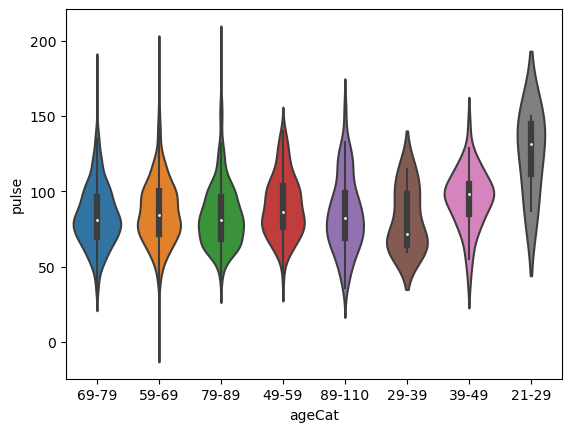

In [15]:
#51.Display a violin chart to show distribution of Pulse Rate against age.
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.violinplot(x=Demography["ageCat"],y=df1["pulse"])

C:\Users\email\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


<Axes: xlabel='ageCat', ylabel='readmission_time_days_from_admission'>

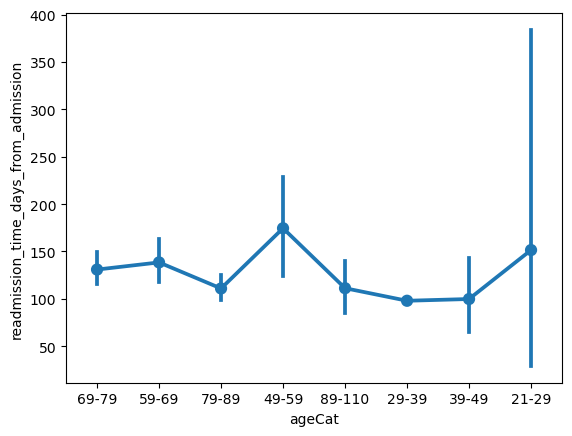

In [17]:
#52.Create a Point Plot on Age against time to readmission.
sns.pointplot(x=Demography["ageCat"],y=df_HD["readmission_time_days_from_admission"])

In [20]:
#53.What is the correlation between CCI score and outcome?

df_HD['outcome_during_hospitalization']= pd.factorize(df_HD.outcome_during_hospitalization)[0]
df_HD['outcome_during_hospitalization'].corr(df_PH['CCI_score'])

0.09384336715987612

In [21]:
#54.For all non-negative integers that are also even numbers in the array [0,1,2,6,8] print i*i
listA=[0,1,2,6,8]
for number in listA:
  if((number % 2 == 0) & (number>=0)):
      print(number*number)

0
4
36
64


In [4]:
#Q65.Which Admission Ward has maximum number of visits scheduled?
df1 = df_HD

# counts of discharge_department
DD_value_counts = df1['discharge_department'].value_counts()
data = dict(DD_value_counts)
print(data)

# Extract discharge_department and visit_times columns
discharge_department = df1['discharge_department']
visit_times = df1['visit_times']

# Create a DataFrame with both columns
df2 = pd.DataFrame({'discharge_department': discharge_department, 'visit_times': visit_times})
print(df2)
#Getting unique discharge department with total visit time
ward_visits = df2.groupby('discharge_department')['visit_times'].sum().reset_index()
print(ward_visits)
#maximum visit per department
max_visits_ward = ward_visits.loc[ward_visits['visit_times'].idxmax()]

print(f"The admission ward with the maximum number of scheduled visits is '{max_visits_ward['discharge_department']}' "
      f"with {max_visits_ward['visit_times']} visits.")

{'Cardiology': 1703, 'GeneralWard': 241, 'Others': 52, 'ICU': 12}
     discharge_department  visit_times
0              Cardiology            1
1              Cardiology            1
2              Cardiology            2
3              Cardiology            1
4              Cardiology            1
...                   ...          ...
2003          GeneralWard            1
2004          GeneralWard            1
2005           Cardiology            1
2006           Cardiology            1
2007           Cardiology            1

[2008 rows x 2 columns]
  discharge_department  visit_times
0           Cardiology         1872
1          GeneralWard          254
2                  ICU           13
3               Others           55
The admission ward with the maximum number of scheduled visits is 'Cardiology' with 1872 visits.


In [5]:
#Q66.Display total count of patients in each discharge_department based on gender.
df_HD
df_Demo
# Merge Hospitalization_Discharge and Demography on inpatient_number 
df_merged = pd.merge(df_HD, df_Demo, on='inpatient_number')
#print(df_merged)
#No of patients discharge department wise
patients_count = df_merged.groupby(['discharge_department', 'gender']).size().reset_index(name='count')
print(patients_count)
#display total count of patients in each discharge_department based on gender.
pivot_table = patients_count.pivot_table(index='discharge_department', columns='gender', values='count', fill_value=0)
print(pivot_table)

  discharge_department  gender  count
0           Cardiology  Female    993
1           Cardiology    Male    710
2          GeneralWard  Female    137
3          GeneralWard    Male    104
4                  ICU  Female      5
5                  ICU    Male      7
6               Others  Female     28
7               Others    Male     24
gender                Female  Male
discharge_department              
Cardiology               993   710
GeneralWard              137   104
ICU                        5     7
Others                    28    24


In [7]:
#Q67.How many Unique patients were precribed each type of medication?
df_Ppres

#Methord 1
Unique_patients1=df_Ppres.groupby(["Drug_name"]).size().reset_index(name='count')
print(Unique_patients1)

#Methord 2
unique_patients = df_Ppres.groupby('Drug_name')['inpatient_number'].nunique().reset_index(name='count')
print(unique_patients)

                                           Drug_name  count
0                      Aspirin enteric-coated tablet    958
1                        Atorvastatin calcium tablet    822
2                    Benazepril hydrochloride tablet    434
3               Clopidogrel Hydrogen Sulphate tablet    401
4                              Deslanoside injection   1017
5                                     Digoxin tablet    999
6                 Dobutamine hydrochloride injection     22
7                        Enoxaparin Sodium injection    113
8                               Furosemide injection   1720
9                                  Furosemide tablet   1641
10                          Heparin Sodium injection    153
11                        Hydrochlorothiazide tablet    283
12              Isoprenaline Hydrochloride injection     30
13   Isosorbide Mononitrate Sustained Release tablet    326
14  Meglumine Adenosine Cyclophosphate for injection   1115
15     Metoprolol Succinate Sustained-re

In [8]:
#Q68.Find 5 patients with the highest Discharge days greater than 20. List their most common outcome(notcompleted).
df=df_HD

#Displaing discharge day by inpatient no
dischargeDay=df['dischargeDay']
Inpatient_no=df['inpatient_number']
df2 = pd.DataFrame({'inpatient_number': Inpatient_no, 'dischargeDay': dischargeDay})
print(df2)

# Filtering only, base on discharge day>20
filtered_df = df_HD[df_HD['dischargeDay'] > 20]
df3=filtered_df[['inpatient_number','dischargeDay']]
print(df3)

# Top 5 patients
print(df3.head(5))

      inpatient_number  dischargeDay
0               857781            11
1               743087             8
2               866418             5
3               775928            11
4               810128             5
...                ...           ...
2003            740689             5
2004            734280             8
2005            781004            14
2006            744870             1
2007            791864             6

[2008 rows x 2 columns]
      inpatient_number  dischargeDay
7               787530            27
13              744167            22
63              859541            30
68              779834            21
89              773090            26
...                ...           ...
1945            842942            32
1976            777237            21
1987            759370            28
1997            750447            29
1999            804209            29

[102 rows x 2 columns]
    inpatient_number  dischargeDay
7             787530        

In [7]:
#17. Using arrays and loops find the number of patients who were Admitted in the month of November

df1=df_HD
AD_value_counts= df1['Admission_date'].value_counts()
print(AD_value_counts)

Admission_date
2018-06-20    6
2018-04-30    6
2017-03-29    6
2017-04-21    6
2017-10-31    5
             ..
2016-01-27    1
2016-10-05    1
2017-07-25    1
2017-08-14    1
2016-07-09    1
Name: count, Length: 1100, dtype: int64


In [ ]:
#1.How many patients were registered in each unique occupation?
import pandas as pd 
Demo=pd.read_excel("Cardiac_Outcomes.xlsx","Demography") 
occupation_occurence=Demo["occupation"].value_counts() 
occupation_occurence.sort_values(axis = 0, ascending = False)


In [41]:
#Q33. Retrieve the row with minimum white_blood_cell count using sorting technique
      #Expl: sorting the column white_blood_cell with sort_value() and found out min value with head()
df_Labs.sort_values(by="white_blood_cell").head(1)

,inpatient_number,body_temperature,pulse,respiration,systolic_blood_pressure,diastolic_blood_pressure,map,fio2,creatinine_enzymatic_method,urea,...,measured_residual_base,measured_bicarbonate,carboxyhemoglobin,body_temperature_blood_gas,oxygen_saturation,partial_oxygen_pressure,oxyhemoglobin,anion_gap,free_calcium,total_hemoglobin
865,746068,37.1,71,20,130,88,102.0,21,88.8,7.26,...,-2.6,21.6,0.3,37.0,97.0,95.0,96.3,16.8,1.11,94.0
